In [3]:
import cv2
import numpy as np


CbinMax = 33
Cbinsz = [1+CbinMax/2, CbinMax, CbinMax]
Cbins = Cbinsz[0]*Cbinsz[1]*Cbinsz[2]
a = np.logspace(np.log(1), np.log(128) , num=1 + CbinMax/2, base=2) - 1.
a = 127.*a/a.max()
b = a.tolist()
b.reverse()
b = 127. - np.array(b)
r = np.hstack((b, a+128.)).round().astype(np.int).tolist()
l1 = np.linspace(0, 255, 1+Cbinsz[0]).tolist()
CrangeL=[l1, r, r]

def idx_to_lab(Ind):
    index = np.unravel_index(Ind,(17,33,33))
    li=index[0]
    ai=index[1]
    bi=index[2]
    resultcolor=[(CrangeL[0][li]+CrangeL[0][li+1])/2, (CrangeL[1][ai]+CrangeL[1][ai+1])/2, (CrangeL[2][bi]+CrangeL[2][bi+1])/2 ]
    return "idx_to_lab", resultcolor

def labcolor_to_rgb(labcolor):
    mask_img = np.ones((1, 1, 3)) * labcolor
    rgbimg = cv2.cvtColor(np.uint8(mask_img), cv2.COLOR_LAB2BGR)
    return (rgbimg[0][0][2], rgbimg[0][0][1], rgbimg[0][0][0])
    
def lab2rgb(Ind):
    index = np.unravel_index(Ind, (17, 33, 33))
    li = index[0]
    ai = index[1]
    bi = index[2]
    resultcolor = [(self.CrangeL[0][li] + self.CrangeL[0][li + 1]) / 2,
                   (self.CrangeL[1][ai] + self.CrangeL[1][ai + 1]) / 2,
                    (self.CrangeL[2][bi] + self.CrangeL[2][bi + 1]) / 2]
    mask_img = np.ones((1, 1, 3)) * resultcolor
    rgbimg = cv2.cvtColor(np.uint8(mask_img), cv2.COLOR_LAB2BGR)
    return rgbimg[0][0]

def rgb_to_lab(rgbcolor):
    color_code_mask = np.ones((1,1,3))*rgbcolor
    rgbimg= cv2.cvtColor(np.uint8(color_code_mask),cv2.COLOR_RGB2LAB)
    return (rgbimg[0][0][0],rgbimg[0][0][1],rgbimg[0][0][2])
#c=color_util3.colorUtil3()
%matplotlib inline

Color dictionary with 188 colors


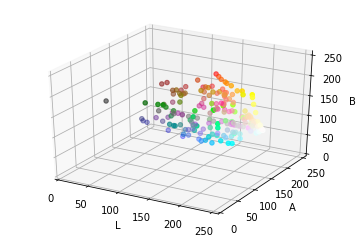

Color dictionary with 661 colors


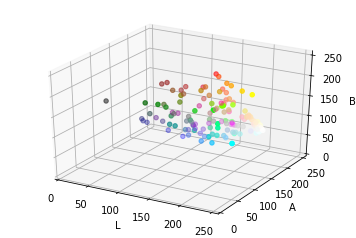

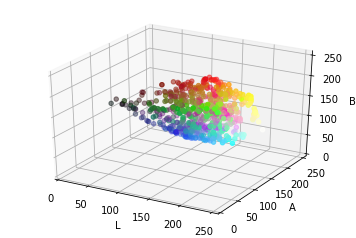

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import json
import csv

with open("MSDColors.json") as f:
    color_list = json.load(f)

print "Color dictionary with", len(color_list), "colors"

r = [] 
g = [] 
b = [] 
l_new = [] 
a_new = [] 
b_new = [] 
names = [] 
colors = [] 

for name,value in color_list.iteritems():
    lab = value['lab']
    lab = [float(l10) for l10 in lab]
    names.insert(len(names), name)
    l1 = list(reversed(value['bgr']))
    temp = rgb_to_lab(tuple(l1))
    l1  = [float(l2) for l2 in l1]
    l_new.insert(len(l_new), temp[0])
    a_new.insert(len(a_new), temp[1])
    b_new.insert(len(b_new), temp[2])
    r.insert(len(r), l1[0])
    g.insert(len(g), l1[1])
    b.insert(len(b), l1[2])
    l1  = [float(l2)/255.0 for l2 in l1]
    temp = tuple(l1)
    colors.insert(len(colors), temp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('B')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_zlim(0,255)
ax.scatter(l_new, a_new, b_new, c=colors)
plt.show()



with open("color_dict.json") as f:
    color_list_old = json.load(f)
    
primary_colors = csv.DictReader(open('Colors_30.csv'))

print "Color dictionary with", len(color_list_old), "colors"

names_primary=[]
colors_primary=[]
l_primary=[]
a_primary=[]
b_primary=[]
for color in primary_colors:
    names_primary.insert(len(names_primary), color['Name'])
    l1=[int(color['Red']), int(color['Green']), int(color['Blue'])]
    temp = rgb_to_lab(tuple(l1))
    l1  = [float(l2) for l2 in l1]
    l_primary.insert(len(l_primary), temp[0])
    a_primary.insert(len(a_primary), temp[1])
    b_primary.insert(len(b_primary), temp[2])
    l1  = [float(l2)/255.0 for l2 in l1]
    temp = tuple(l1)
    colors_primary.insert(len(colors_primary), temp)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('B')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_zlim(0,255)
ax.scatter(l_primary, a_primary, b_primary, c=colors_primary)
plt.show()

l_old = []
a_old = []
b_old = []
names_old = []
colors_old = []
for name,value in color_list_old.iteritems():
    lab_old = value['lab']
    lab_old = value['lab'].split(',')
    lab_old  = [float(l11) for l11 in lab_old]
    names_old.insert(len(names_old), name)
    l1_old = value['lab'].split(',')
    l1_old = [float(gh) for gh in l1_old]
    l_old.insert(len(l_old), l1_old[0])
    a_old.insert(len(a_old), l1_old[1])
    b_old.insert(len(b_old), l1_old[2])
    l1_old = labcolor_to_rgb((float(l1_old[0]), float(l1_old[1]), float(l1_old[2])))
    l1_old  = [float(l2)/255.0 for l2 in l1_old]
    temp = tuple(l1_old)
    colors_old.insert(len(colors_old), temp)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('B')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_zlim(0,255)
# l_old=l_old + l_primary
# a_old=a_old + a_primary
# b_old=b_old + b_primary
# colors_old=colors_old+colors_primary
# names_old=names_old+names_primary
ax.scatter(l_old, a_old, b_old, c=colors_old)
#ax.scatter(l_primary, a_primary, b_primary, c=colors_primary)
plt.show()

slicing the 188 color space on l-axis
0 30


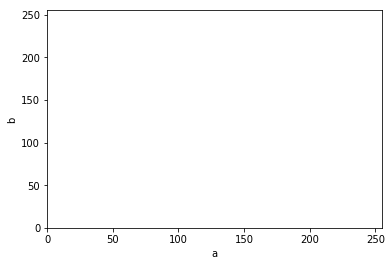

30 60


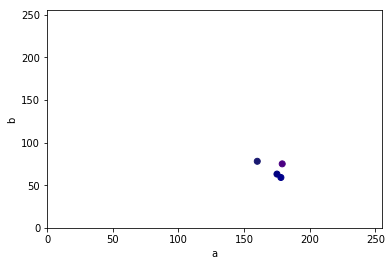

60 90


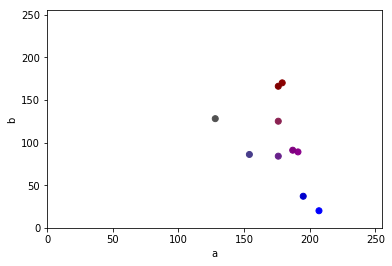

90 120


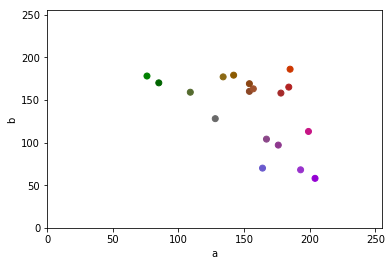

120 150


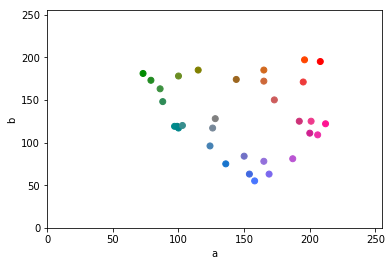

150 180


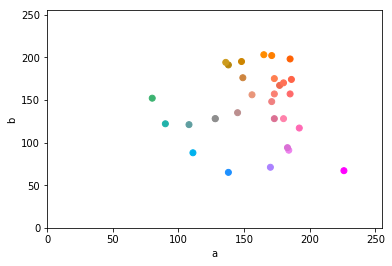

180 210


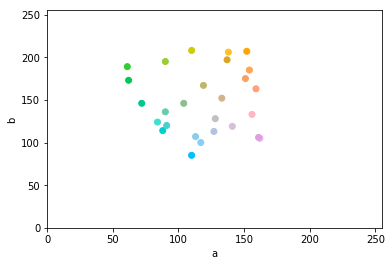

210 240


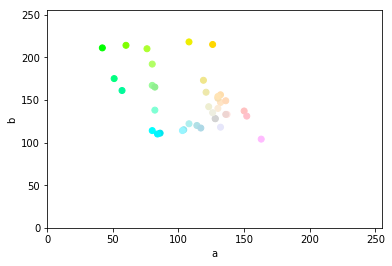

240 270


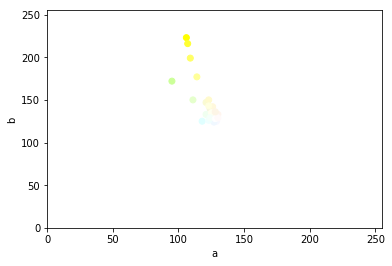

In [33]:
import numpy as np

sliding_window = 30
start = 0
flag = True

print "slicing the 188 color space on l-axis"
while flag:
    slice_a = []
    slice_b = []
    slice_colors = []
    slice_names = []
    for i, val in enumerate(l_new):
        if l_new[i] > start and l_new[i] < start + sliding_window:
            slice_b.append(b_new[i])
            slice_a.append(a_new[i])
            slice_colors.append(colors[i])
    print start, start+sliding_window
    plt.ylabel('b')
    plt.xlabel('a')
    plt.scatter(slice_a, slice_b, c=slice_colors)
    plt.xlim(0,255)
    plt.ylim(0,255)
    plt.show()
    start = start + sliding_window
    if start > 255:
        flag = False

slicing the 661 color space on l-axis
l range:  0 30
original


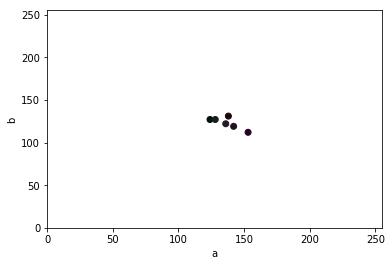

modified


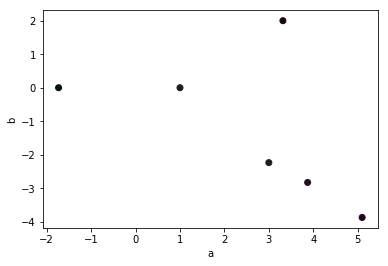

l range:  30 60
original


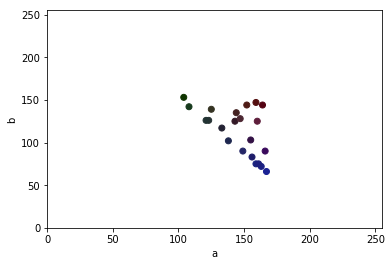

modified


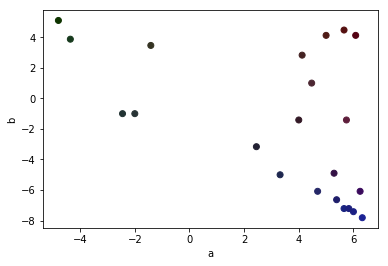

l range:  60 90
original


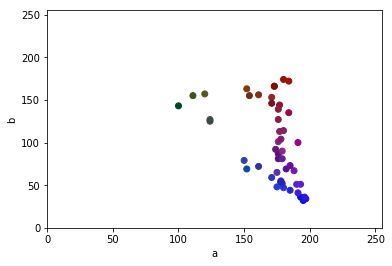

modified


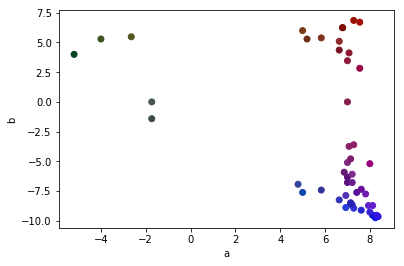

l range:  90 120
original


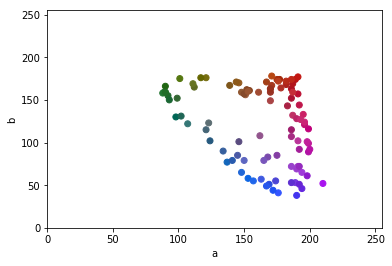

modified


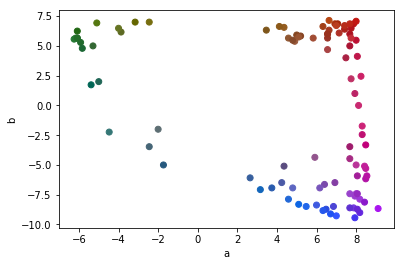

l range:  120 150
original


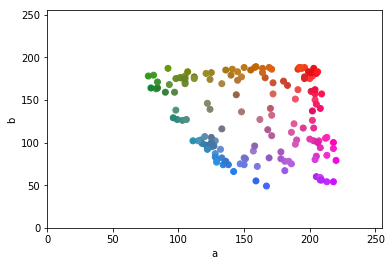

modified


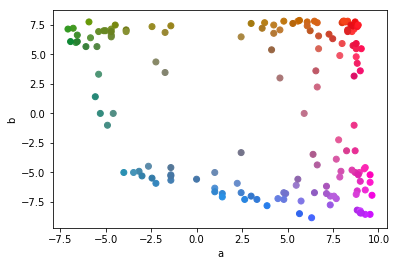

l range:  150 180
original


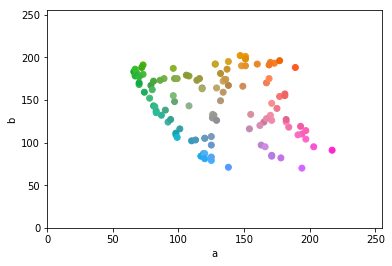

modified


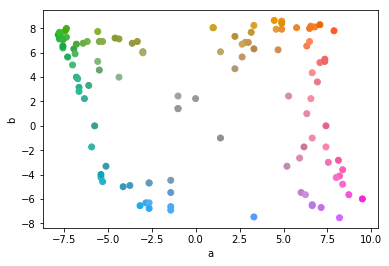

l range:  180 210
original


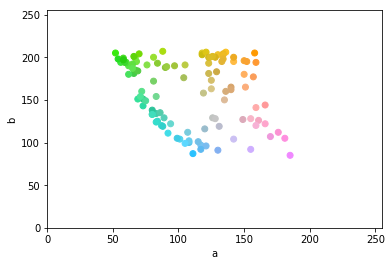

modified


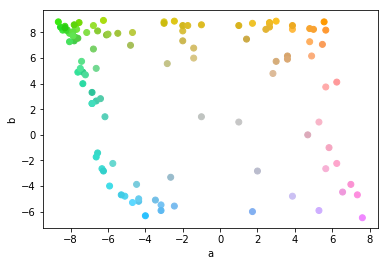

l range:  210 240
original


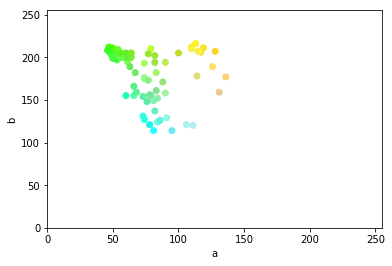

modified


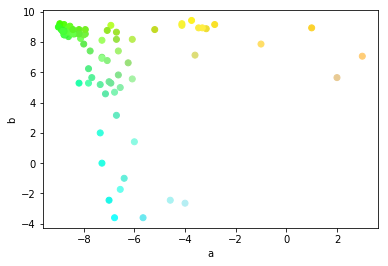

l range:  240 270
original


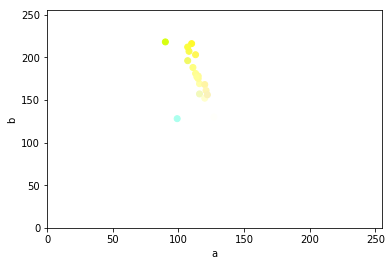

modified


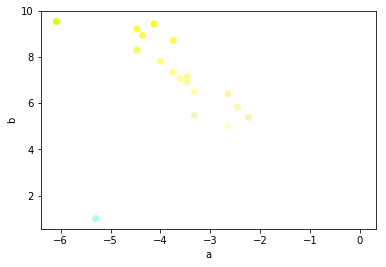

In [28]:
import numpy as np

sliding_window = 30
start = 0
flag = True

print "slicing the 661 color space on l-axis"
while flag:
    slice_a = []
    slice_b = []
    slice_a_off = []
    slice_b_off = []
    slice_colors = []
    slice_names = []
    for i, val in enumerate(l_old):
        if l_old[i] > start and l_old[i] < start + sliding_window:
            b_off = b_old[i] - 127
            a_off = a_old[i] - 127
            slice_b_off.append(np.sign(b_off)*np.sqrt(abs(b_off)))
            slice_a_off.append(np.sign(a_off)*np.sqrt(abs(a_off)))
            slice_b.append(b_old[i])
            slice_a.append(a_old[i])
            slice_colors.append(colors_old[i])
            slice_names.append(names_old[i])
    print "l range: ", start, start+sliding_window
    print "original"
    plt.ylabel('b')
    plt.xlabel('a')
    plt.xlim(np.sqrt(1), np.sqrt(256))
    plt.ylim(np.sqrt(1), np.sqrt(256))
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.scatter(slice_a, slice_b, c=slice_colors)
    plt.show()
    print "modified"
    plt.ylabel('b')
    plt.xlabel('a')
    #plt.xlim(np.log(1), np.log(256))
    #plt.ylim(np.log(1), np.log(256))
    plt.scatter(slice_a_off, slice_b_off, c=slice_colors)
    plt.show()
    start = start + sliding_window
    if start > 255:
        flag = False

turquoise


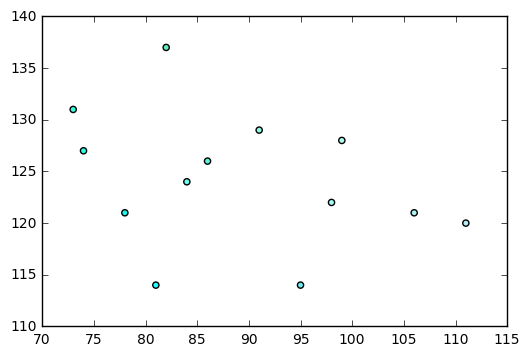

light_green


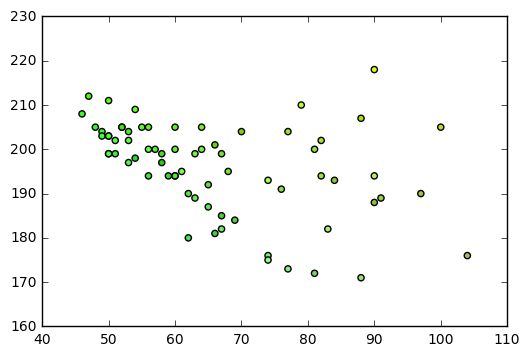

green


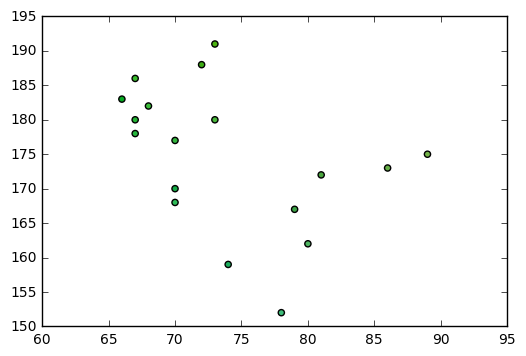

diff_green


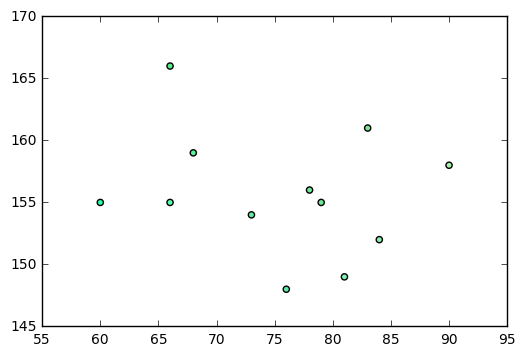

orange


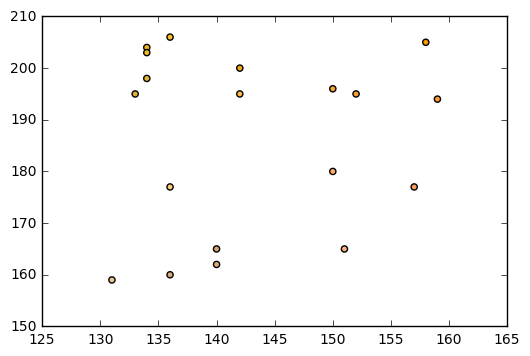

white


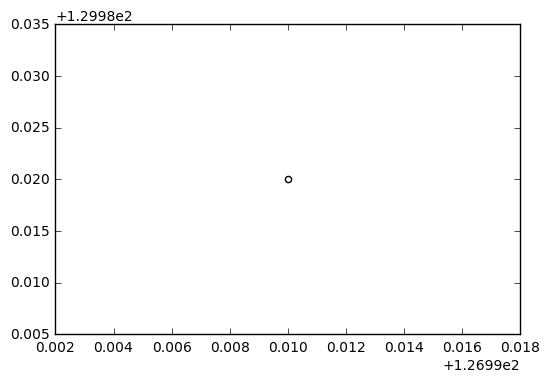

blush


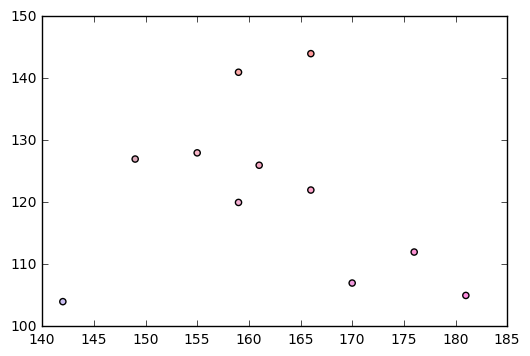

yellow


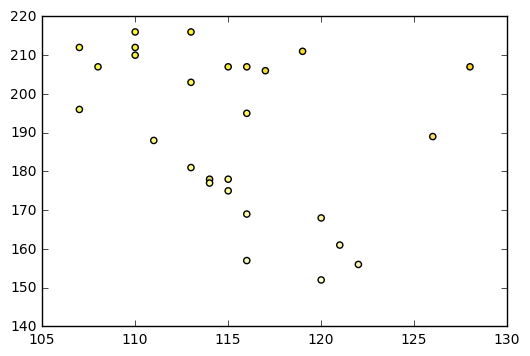

In [5]:
# green = '173, 68, 172'
visualise_cluster = {'turquoise':[{"l_start":210, "l_end":270, "a_start":50, "a_end":115, "b_start":100, "b_end":140}],
                    "yellow":[{"l_start":210, "l_end":300, "a_start":105, "a_end":130, "b_start":140, "b_end":230}],
                    "blush":[{"l_start":180, "l_end":210, "a_start":140, "a_end":190, "b_start":100, "b_end":150}],
                    "green":[{"l_start":150, "l_end":180, "a_start":50, "a_end":95, "b_start":150, "b_end":200}],
                    "light_green":[{"l_start":180, "l_end":270, "a_start":40, "a_end":105, "b_start":170, "b_end":240}],
                    "diff_green":[{"l_start":210, "l_end":270, "a_start":40, "a_end":100, "b_start":140, "b_end":170}],
                    "white":[{"l_start":240, "l_end":270, "a_start":125, "a_end":130, "b_start":120, "b_end":140}],
                    "orange":[{"l_start":180, "l_end":210, "a_start":130, "a_end":170, "b_start":155, "b_end":220},
                              {"l_start":210, "l_end":240, "a_start":130, "a_end":140, "b_start":130, "b_end":180}]}

for name, val in visualise_cluster.iteritems():
    new_a = []
    new_b = []
    new_colors = []
    print name
    for v in val:
        i = 0
        for l_w, a_w, b_w in zip(l_old, a_old, b_old):
            if l_w > v['l_start'] and l_w < v['l_end'] and a_w > v['a_start'] and a_w < v['a_end'] and b_w > v['b_start'] and b_w < v['b_end']:
                    new_a.append(a_w)
                    new_b.append(b_w)
                    new_colors.append(colors_old[i])
            i = i+1
                
    plt.scatter(new_a, new_b, c=new_colors)
    plt.show()

[125.0, 199.0, 177.0]
120 150
(0.9333333333333333, 0.23137254901960785, 0.09019607843137255)
(0.8666666666666667, 0.20392156862745098, 0.054901960784313725)
(0.9019607843137255, 0.09803921568627451, 0.26666666666666666)
(0.9686274509803922, 0.23921568627450981, 0.10588235294117647)
(0.9294117647058824, 0.25098039215686274, 0.08235294117647059)
(0.8941176470588236, 0.11372549019607843, 0.1450980392156863)
(0.8901960784313725, 0.09411764705882353, 0.08627450980392157)
(0.9568627450980393, 0.27058823529411763, 0.10588235294117647)
(0.8823529411764706, 0.054901960784313725, 0.12549019607843137)
(1.0, 0.23137254901960785, 0.23137254901960785)
(1.0, 0.2, 0.20392156862745098)
(0.8666666666666667, 0.13333333333333333, 0.13333333333333333)
(0.8980392156862745, 0.050980392156862744, 0.09803921568627451)
(0.8980392156862745, 0.050980392156862744, 0.09803921568627451)
(0.9686274509803922, 0.07450980392156863, 0.1450980392156863)
(0.8705882352941177, 0.1411764705882353, 0.14901960784313725)
(0.9333

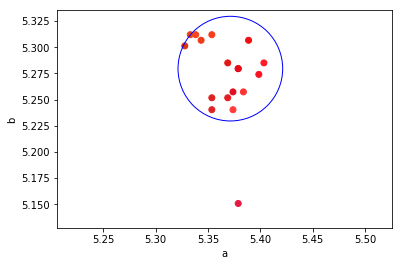

In [72]:
color = "red"
if color in color_list_old:
    color_lab = color_list_old[color]['lab'].split(',')
    color_lab = [float(gh) for gh in color_lab]
print color_lab
nos = [0, 30, 60, 90, 120, 150, 180, 210, 270]
i = 0

start_l = 0
end_l = 0
while(True):
    if (i+1) >= len(nos):
        break
        
    if color_lab[0] >= nos[i] and color_lab[0] <= nos[i+1]:
        start_l = nos[i]
        end_l = nos[i+1]
        break
    i = i + 1
print start_l, end_l
slice_a = []
slice_b = []
slice_colors = []
slice_names = []
for i, val in enumerate(l_old):
    if l_old[i] > start_l and l_old[i] < end_l:
        l1_dist = abs(color_lab[1] - a_old[i]) + abs(color_lab[2] - b_old[i])
        if l1_dist < 20:
            slice_b.append(np.log(b_old[i]/255*275))
            slice_a.append(np.log(a_old[i]/255*275))
            print(colors_old[i])
            slice_colors.append(colors_old[i])
            slice_names.append(names_old[i])
print slice_a, slice_b
print "median", np.median(slice_a), np.median(slice_b)
circle2 = plt.Circle((np.median(slice_a),np.median(slice_b)), 0.05 , color='b', fill=False)
plt.ylabel('b')
plt.xlabel('a')
plt.scatter(slice_a, slice_b, c=slice_colors)
ax = plt.gca()
#ax.axis('equal')
ax.add_artist(circle2)

ax.set_xlim(0, np.log(275))
ax.set_ylim(0, np.log(275))
ax.axis('equal')
plt.show()

In [50]:
newcentres={}
for i in range(len(names_old)):
    color = names_old[i]
    if color in color_list_old:
        color_lab = color_list_old[color]['lab'].split(',')
        color_lab = [float(gh) for gh in color_lab]
    nos = [0, 30, 60, 90, 120, 150, 180, 210, 270]
    i = 0
    start_l = 0
    end_l = 0
    while(True):
        if (i+1) >= len(nos):
            break

        if color_lab[0] >= nos[i] and color_lab[0] <= nos[i+1]:
            start_l = nos[i]
            end_l = nos[i+1]
            break
        i = i + 1
    print start_l, end_l
    slice_a = []
    slice_b = []
    slice_colors = []
    slice_names = []
    for i, val in enumerate(l_old):
        if l_old[i] > start_l and l_old[i] < end_l:
            l1_dist = abs(color_lab[1] - a_old[i]) + abs(color_lab[2] - b_old[i])
            if l1_dist < 25:
                slice_b.append(b_old[i]/255*275)
                slice_a.append(a_old[i]/255*275)
                slice_colors.append(colors_old[i])
                slice_names.append(names_old[i])
#     print slice_a, slice_b
#     print "median", np.median(slice_a), np.median(slice_b)
    newcentres[color]={'l':color_lab[0], 'a':np.median(slice_a), 'b':np.median(slice_b)}
with open('New_Centres', 'w') as f:
        json.dump(newcentres, f, indent=4)
    

180 210
150 180
90 120
210 270
60 90
210 270
60 90
90 120
120 150
90 120
180 210
0 30
60 90
60 90
150 180
30 60
120 150
90 120
150 180
150 180
90 120
90 120
180 210
180 210
90 120
90 120
90 120
120 150
90 120
180 210
210 270
180 210
150 180
60 90
120 150
210 270
120 150
90 120
180 210
90 120
180 210
210 270
150 180
180 210
90 120
120 150
30 60
180 210
90 120
120 150
150 180
210 270
210 270
60 90
180 210
120 150
30 60
90 120
120 150
30 60
120 150
150 180
120 150
210 270
30 60
210 270
30 60
150 180
150 180
210 270
90 120
210 270
90 120
210 270
150 180
120 150
150 180
150 180
150 180
210 270
180 210
120 150
90 120
210 270
30 60
150 180
120 150
210 270
0 30
210 270
120 150
150 180
150 180
210 270
210 270
180 210
150 180
90 120
180 210
60 90
60 90
60 90
180 210
210 270
30 60
90 120
150 180
120 150
60 90
180 210
120 150
120 150
180 210
210 270
150 180
210 270
180 210
60 90
60 90
180 210
120 150
150 180
210 270
90 120
180 210
60 90
150 180
180 210
210 270
150 180
150 180
120 150
60 90
90 120
